This document focuses on analyzing the results and presenting the diagrams for the network model.     
The network model contains two intersections consisting of one east-west road and two north-south roads together.    
as control variables to reduce the pressure on the program to run and increase the efficiency of the algorithm. In this model, all roads will be considered for one-way traffic only.   


# Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def getValue(df):
    result = 0.5 * df['pass_car'] + 0.2 * df['average_speed'] - 0.2 *df['average_wait'] - 0.1*df['average_drive']
    return result

综合评价公式：$$E=0.5\ast N_{car}+\ 0.2\ast S_{avg}-0.2\ast T_{wait}+0.1\ast T_{drive}$$

In [3]:
def getMetrixPlot(df, name):
    variables = ['Low', 'Medium', 'High']
    values = df

    # 创建热图
    fig, ax = plt.subplots()
    im = ax.imshow(values, cmap='viridis')

    # 添加标签
    for i in range(len(variables)):
        for j in range(len(variables)):
            text = ax.text(j, i, f'{values[i][j]:.2f}', ha='center', va='center', color='w')

    # 设置坐标轴
    ax.set_xticks(np.arange(len(variables)))
    ax.set_yticks(np.arange(len(variables)))
    ax.set_xticklabels(variables)
    ax.set_yticklabels(['High', 'Medium', 'Low'])
    ax.set_title(name)
    ax.set_xlabel('north-south direction traffic flow')
    ax.set_ylabel('east-west direction traffic flow')
    plt.colorbar(im)

    # 显示热图
    plt.show()

In [4]:
def getData(df):
    ## get analysis of one states and get results
    df.columns = df.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_').str.replace('-', '_').str.replace('?', '').str.strip()
    df = df[['pass_car', 'average_speed', 'average_wait', 'average_drive']]
    return df

In [5]:
def getRLData(df):
    df.columns = df.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_').str.replace('-', '_').str.replace('?', '').str.strip()
    df.sort_values(by='step').reset_index(drop=True)
    index = df[df['time'] == 0].index[-20000:]
    df_new = df.iloc[index-1]
    df_new = df_new[['avg_reward','pass_car','average_speed','average_wait','average_drive']].reset_index(drop=True)

    return df_new

In [6]:
def getBoxplots(df, title = ''):
    columns_to_plot = df.columns.to_list()

    # Plot the box plots
    plt.figure(figsize=(12, 6))
    # Add the main title
    if title:
        plt.suptitle(title, fontsize=16)
    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(1, len(columns_to_plot), i)
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.title(f'{column}')
        plt.grid(True, axis='y', linestyle='--')

        # Calculate statistics for each column
        column_max = df[column].max()
        column_min = df[column].min()
        column_mean = df[column].mean()

        # Add text annotations for mean, max, and min values
        plt.text(1, column_mean, f"Mean: {column_mean:.2f}", ha='center', va='bottom', color='red')
        plt.text(1, column_max, f"Max: {column_max}", ha='center', va='bottom', color='blue')
        plt.text(1, column_min, f"Min: {column_min}", ha='center', va='top', color='green')
    
    
    plt.tight_layout()
    plt.show()


In [7]:
def getTrend(df_bd):
    # List of columns to plot
    columns_to_plot = ['avg_reward', 'pass_car', 'average_speed', 'average_wait', 'average_drive']

    # Plot each column separately
    plt.figure(figsize=(12, 10))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(5, 1, i)
        plt.scatter(df_bd.index, df_bd[column], marker='o',s=1)
        plt.xlabel('step')
        plt.ylabel(column)
        plt.title(f'{column} trend during training')
        plt.grid(True, linestyle='--')
        # Fit a linear regression line
        z = np.polyfit(df_bd.index, df_bd[column], 5)
        p = np.poly1d(z)
        plt.plot(df_bd.index, p(df_bd.index), color='red')


    plt.tight_layout()
    plt.show()

# Data analysis

## Pre-defined mode & Random mode

In [8]:
csv_normal = pd.read_csv('./model/final/0_double_junction_model normal-table.csv')
csv_random = pd.read_csv('./model/final/0_double_junction_model random-table.csv')

In [9]:
data_normal = getData(csv_normal)[1:].reset_index(drop=True)
data_random = getData(csv_random)[1:].reset_index(drop=True)

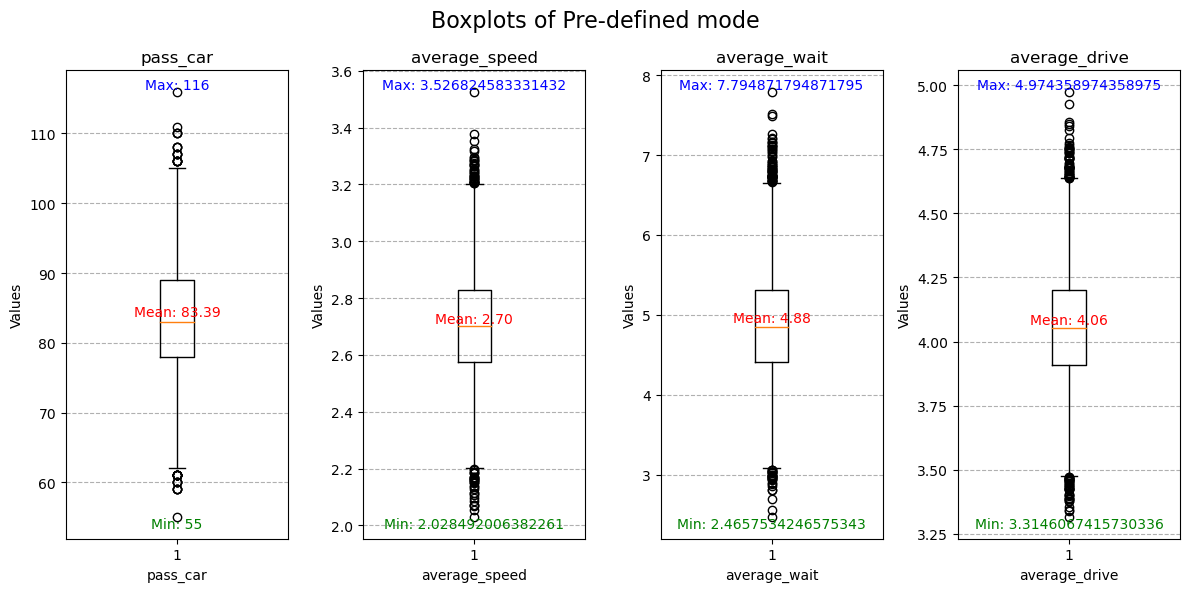

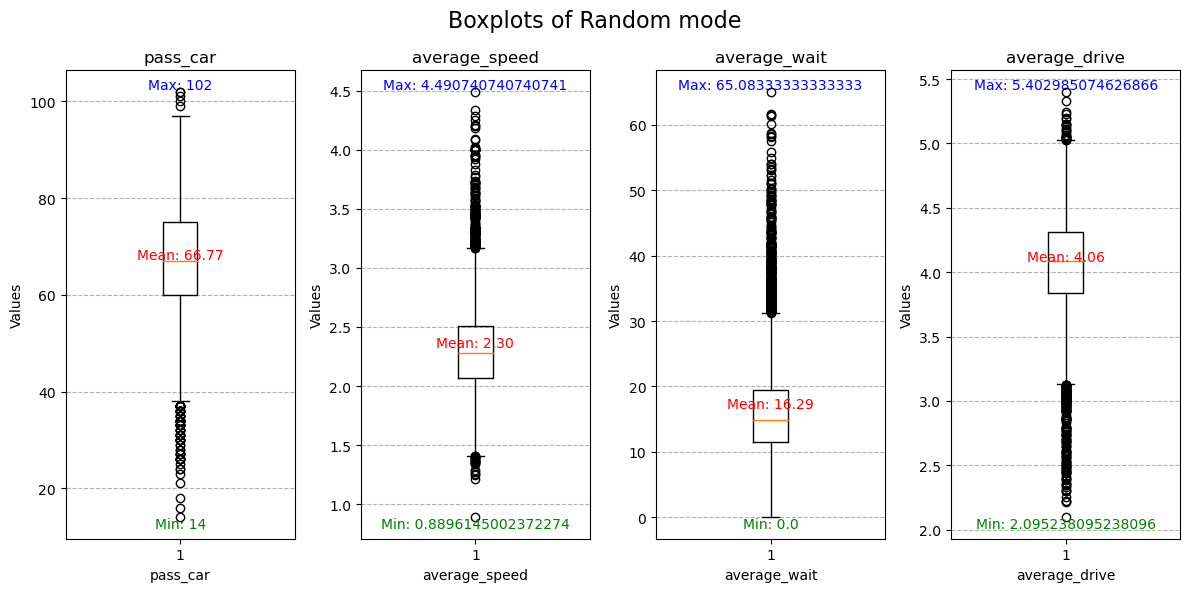

In [10]:
getBoxplots(data_normal, 'Boxplots of Pre-defined mode')
getBoxplots(data_random, 'Boxplots of Random mode')

## Q-Learning mode

In [ ]:
csv_rl = pd.read_csv('./model/final/0_double_junction_model_RL RL-BD-1-table.csv')
csv_rl.columns = csv_rl.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_').str.replace('-', '_').str.replace('?', '').str.strip()
csv_rl.sort_values(by='step').reset_index(drop=True)

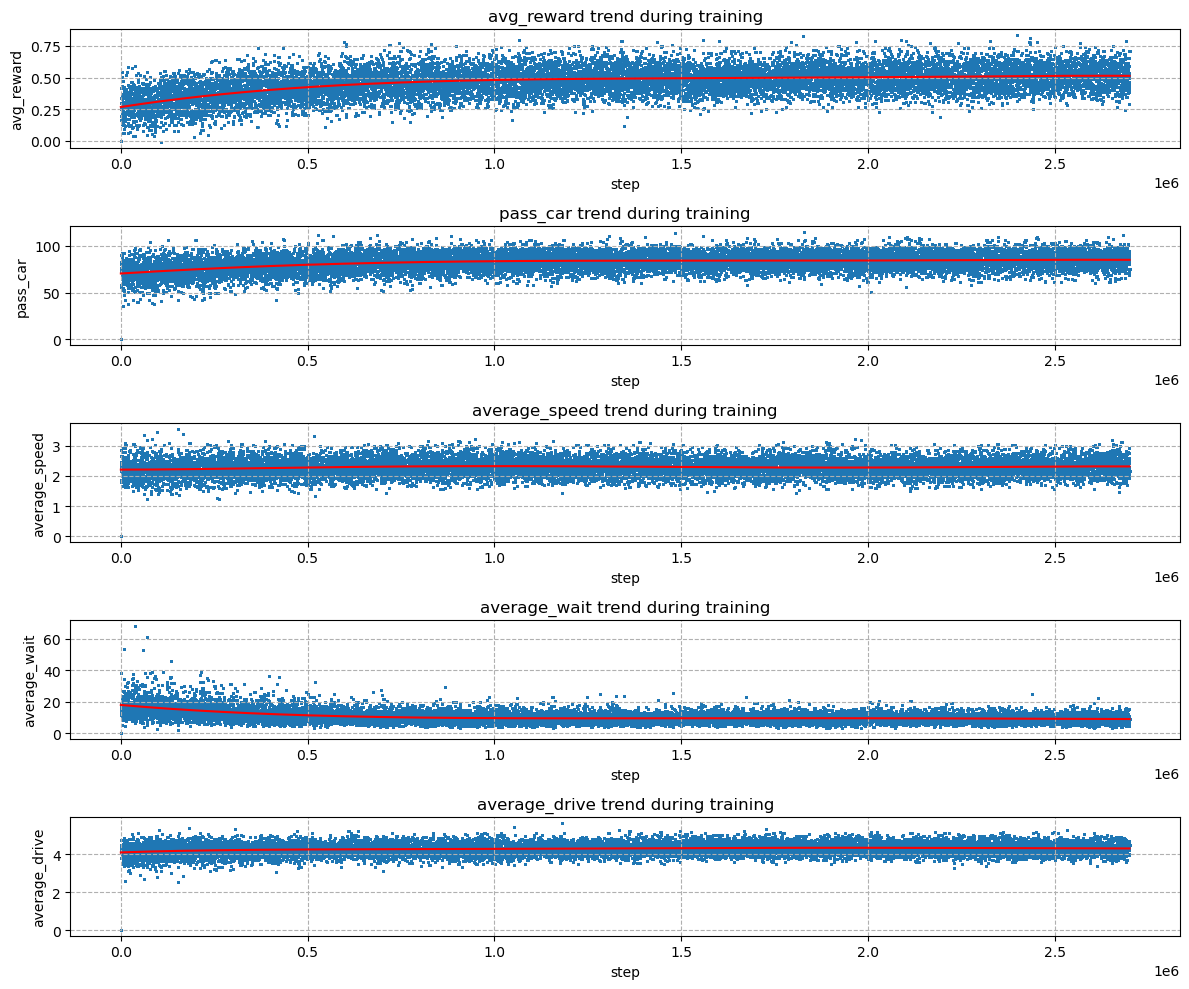

In [17]:
getTrend(csv_rl)

In [18]:
data_rl = getRLData(csv_rl)[-100:].reset_index(drop=True)

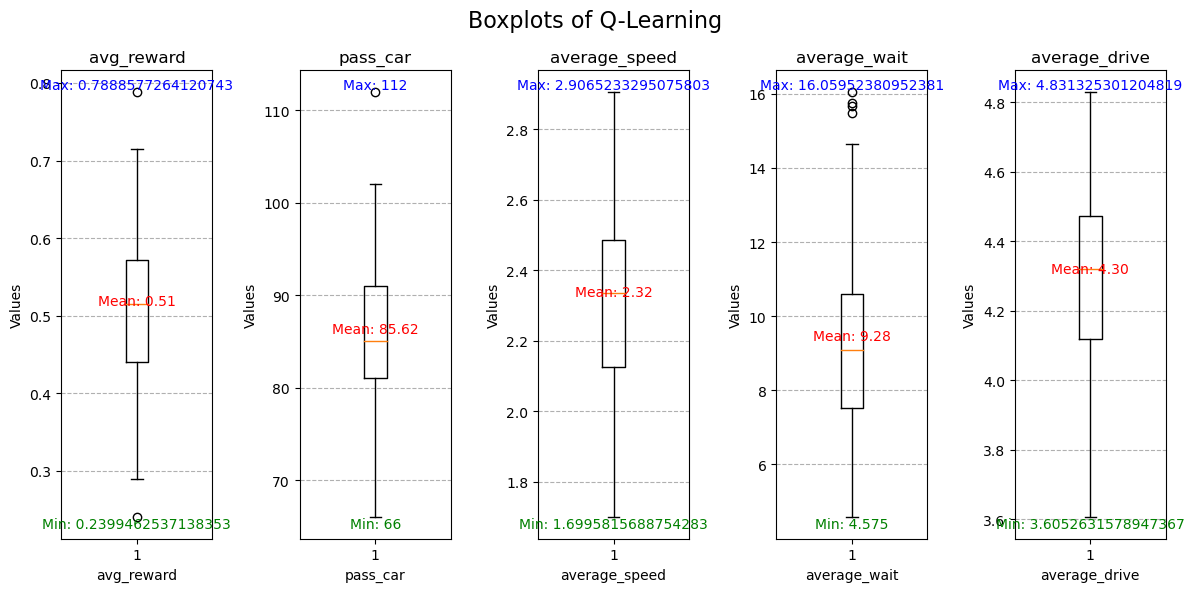

In [19]:
getBoxplots(data_rl, 'Boxplots of Q-Learning')

In [20]:
data_rl.describe()

,avg_reward,pass_car,average_speed,average_wait,average_drive
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.509579,85.620000,2.318342,9.277050,4.299038
std,0.094464,7.886544,0.267969,2.572847,0.252043
min,0.239946,66.000000,1.699582,4.575000,3.605263
25%,0.440039,81.000000,2.125937,7.510948,4.117800
50%,0.514758,85.000000,2.334416,9.087209,4.320242
75%,0.572015,91.000000,2.484862,10.598214,4.472299
max,0.788858,112.000000,2.906523,16.059524,4.831325


In [21]:
data_normal_mean = data_normal.describe().loc['mean', ['pass_car', 'average_speed', 'average_wait', 'average_drive']]
data_random_mean = data_random.describe().loc['mean', ['pass_car', 'average_speed', 'average_wait', 'average_drive']]
data_rl_mean = data_rl.describe().loc['mean', ['pass_car', 'average_speed', 'average_wait', 'average_drive']]

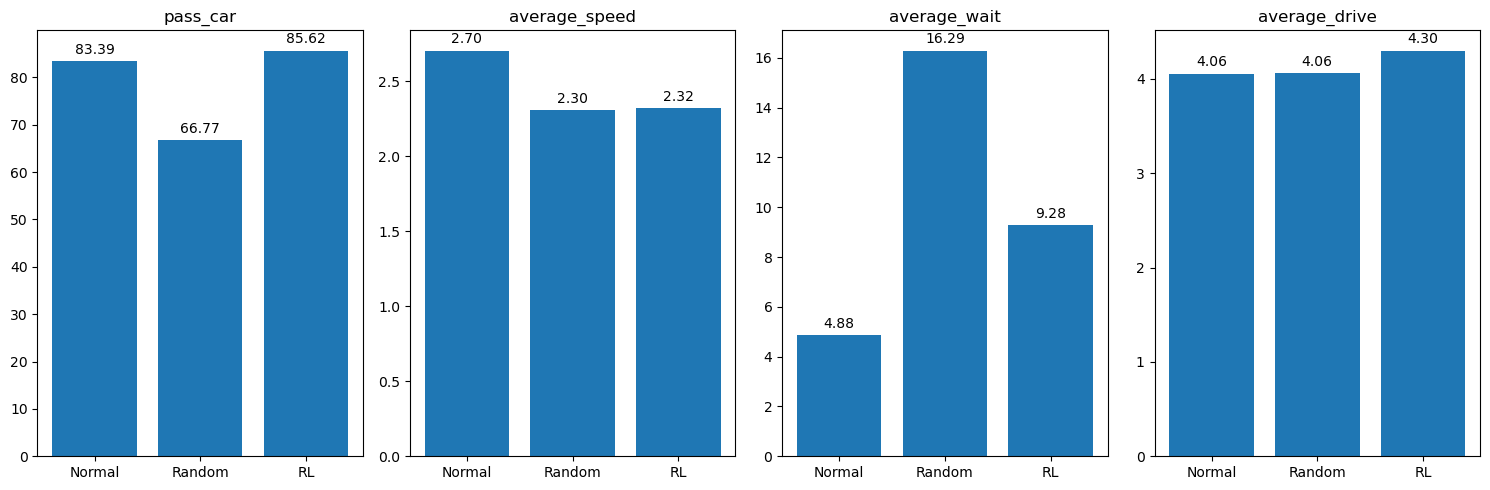

In [22]:
indicators = ['pass_car', 'average_speed', 'average_wait', 'average_drive']

fig, axes = plt.subplots(1, len(indicators), figsize=(15, 5))

# 循环绘制每个柱状图
for i, indicator in enumerate(indicators):
    ax = axes[i]
    data_values = [data_normal_mean[indicator], data_random_mean[indicator], data_rl_mean[indicator]]
    x = np.arange(len(data_values))
    bars = ax.bar(x, data_values)
    ax.set_xticks(x)
    ax.set_xticklabels(['Normal', 'Random', 'RL'])
    ax.set_title(indicator)
    
    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

In [23]:
print(getValue(data_normal.describe().loc['mean']))
print(getValue(data_random.describe().loc['mean']))
print(getValue(data_rl.describe().loc['mean']))

40.856394463327945
30.183145292115668
40.988354632801084


In [24]:
data_rl.describe().to_csv('data_rl.csv', index=True)
data_normal.describe().to_csv('data_normal.csv', index=True)
data_random.describe().to_csv('data_random.csv', index=True)

## Behavior example

In [25]:
csv_rl.columns = csv_rl.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_').str.replace('-', '_').str.replace('?', '').str.strip()
csv_rl.sort_values(by='step').reset_index(drop=True)
index = csv_rl[csv_rl['time'] == 0].index[-20000:]

In [26]:
sample = csv_rl[index[-5]:index[-4]][['singal1_EW', 'singal2_EW']].reset_index(drop=True)
sample = sample.replace(0, -1)

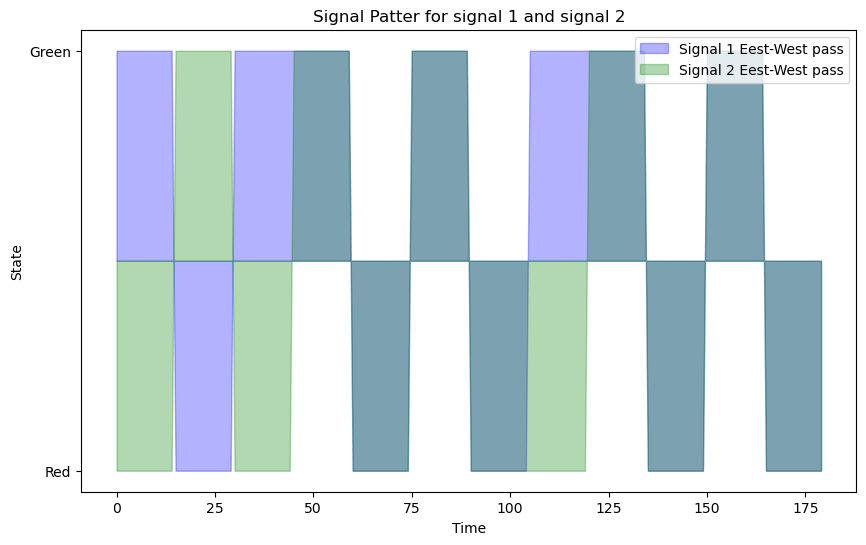

In [27]:
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.fill_between(sample.index, sample['singal1_EW'], label='Signal 1 Eest-West pass', color='blue', alpha=0.3)
plt.fill_between(sample.index, sample['singal2_EW'], label='Signal 2 Eest-West pass', color='green', alpha=0.3)

# 设置标题、标签和图例
plt.title('Signal Patter for signal 1 and signal 2')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.yticks([sample.min().min(), sample.max().max()], ['Red', 'Green'])
# 显示图表
plt.show()

In [37]:
smple_data = csv_rl[index[-4]:index[-3]][['pass_car', 'average_speed', 'average_wait', 'average_drive']].reset_index(drop=True)
smple_data

,pass_car,average_speed,average_wait,average_drive
0,83,2.584457,6.722892,4.216867
1,83,2.584457,6.722892,4.216867
2,83,2.584457,6.722892,4.216867
3,83,2.584457,6.722892,4.216867
4,83,2.584457,6.722892,4.216867
...,...,...,...,...
175,83,2.584457,6.722892,4.216867
176,83,2.584457,6.722892,4.216867
177,83,2.584457,6.722892,4.216867
178,83,2.584457,6.722892,4.216867
